# Análise Exploratória

O Bitcoin é uma moeda digital descentralizada, criada em 2009 por uma entidade sob o pseudônimo de Satoshi Nakamoto, projetada para permitir transações financeiras sem a necessidade de intermediários, como bancos ou governos. Baseado na tecnologia blockchain, o Bitcoin utiliza um registro público e distribuído para garantir a transparência, segurança e imutabilidade das transações. Seu fornecimento total é limitado a 21 milhões de unidades, e novas moedas são geradas por meio do processo de mineração, no qual computadores resolvem problemas criptográficos complexos. Considerado tanto uma forma de pagamento quanto uma reserva de valor, o Bitcoin tem sido amplamente adotado como um ativo de investimento e um mecanismo de proteção contra inflação em alguns contextos econômicos.

Iremos utilizar a biblioteca ccxt para obter dados de mercado sobre o Bitcoin. A biblioteca CCXT (CryptoCurrency eXchange Trading Library) é uma ferramenta unificada para acessar APIs de diversas exchanges de criptomoedas, facilitando a negociação, obtenção de dados de mercado e gerenciamento de contas de forma padronizada em múltiplas plataformas.

In [117]:
# Instalar as dependências necessárias para o projeto
%pip install ccxt
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [119]:
# Importar as bibliotecas necessárias
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
import time

A função fetch_all_binance_data coleta todos os dados históricos de preço no formato OHLCV (Open, High, Low, Close, Volume) para o par de negociação BTC/USDT na Binance, com granularidade diária por padrão. Ela inicializa a conexão com a exchange usando a biblioteca CCXT e começa a buscar dados a partir de 1º de janeiro de 2017. Em um loop contínuo, ela coleta dados em blocos de até 1000 registros por vez (limite da API), avançando o ponto inicial (since) após cada lote e adicionando os dados à lista all_data. Após concluir o processo, os dados são convertidos em um DataFrame do Pandas, com os timestamps formatados para o tipo de data, e o resultado final é ordenado cronologicamente antes de ser retornado. O uso de time.sleep(1) reduz a carga na API durante a execução.

In [121]:
# Função para baixar dados de OHLCV do par BTC/USDT
# OHLCV = Open, High, Low, Close, Volume
def fetch_all_binance_data(symbol="BTC/USDT", timeframe="1d"):
    exchange = ccxt.binance()
    since = exchange.parse8601("2017-01-01T00:00:00Z")
    all_data = []
    max_limit = 1000

    while True:
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=since, limit=max_limit)
        if not ohlcv:
            break
        all_data.extend(ohlcv)
        since = ohlcv[-1][0] + 1
        print(f"Baixados {len(all_data)} registros...")
        time.sleep(1)

    df = pd.DataFrame(
        all_data, columns=["timestamp", "open", "high", "low", "close", "volume"]
    )
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
    df = df[["timestamp", "open", "high", "low", "close", "volume"]].sort_values(
        "timestamp"
    )
    return df

In [122]:
# Coletar os dados de cotação
btc_data = fetch_all_binance_data()

Baixados 1000 registros...
Baixados 2000 registros...
Baixados 2735 registros...


O volume retornado pela API fetch_ohlcv da Binance (e outras exchanges) refere-se ao volume de negociação em termos da criptomoeda base no par de negociação. No caso do par BTC/USDT, o volume representa a quantidade total de BTC negociado no período especificado (por exemplo, um dia no timeframe '1d').

Esse volume não é diretamente em dólares, mas pode ser convertido multiplicando o volume de BTC pelo preço médio (por exemplo, o preço de fechamento). Também não representa a quantidade de transações, mas sim a soma total da quantidade de criptomoeda negociada em todas as transações no período.

In [123]:
# Dados incluem final de semana
btc_data.head(7)

,timestamp,open,high,low,close,volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
5,2017-08-22,4016.00,4104.82,3400.00,4040.00,966.684858
6,2017-08-23,4040.00,4265.80,4013.89,4114.01,1001.136565


In [124]:
btc_data.tail()

,timestamp,open,high,low,close,volume
2730,2025-02-06,96612.44,99120.00,95676.64,96554.35,23515.20405
2731,2025-02-07,96554.35,100137.99,95620.34,96506.80,31794.22065
2732,2025-02-08,96506.80,96880.00,95688.00,96444.74,10147.24294
2733,2025-02-09,96444.75,97323.09,94713.00,96462.75,14120.91613
2734,2025-02-10,96462.75,98345.00,95256.00,97291.85,17862.49854


In [125]:
# Estatísticas descritivas
descriptive_stats = btc_data.describe()
display(descriptive_stats)

,timestamp,open,high,low,close,volume
count,2735,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000
mean,2021-05-15 00:00:00.000000256,28079.266494,28756.242066,27359.218567,28113.334826,67505.242976
min,2017-08-17 00:00:00,3188.010000,3276.500000,2817.000000,3189.020000,228.108068
25%,2019-07-01 12:00:00,8613.465000,8816.390000,8295.830000,8617.500000,27762.254685
50%,2021-05-15 00:00:00,20574.000000,21090.000000,20107.900000,20588.840000,43397.282980
75%,2023-03-29 12:00:00,42741.625000,43537.380000,41738.710000,42765.035000,70630.951450
max,2025-02-10 00:00:00,106143.820000,109588.000000,105321.490000,106143.820000,760705.362783
std,NaN,23565.374549,24079.998556,23043.642777,23598.115630,79698.556003


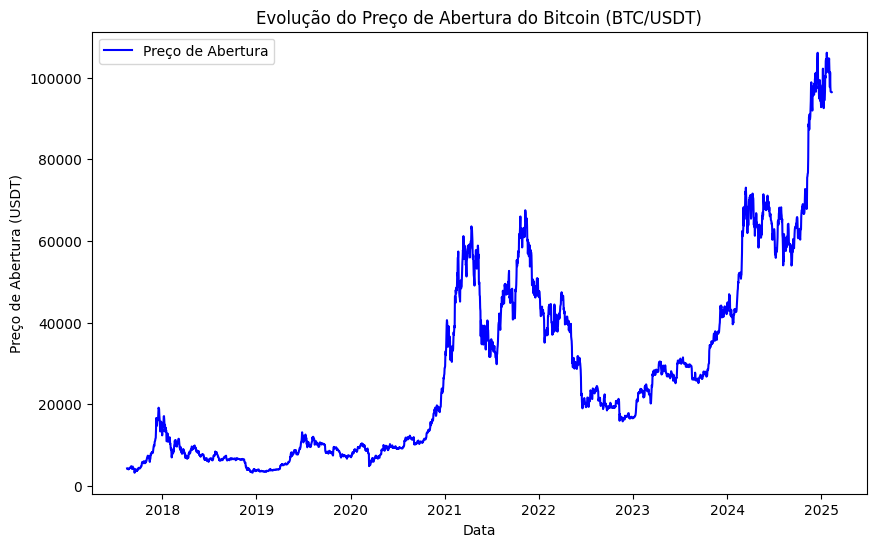

In [126]:
# Visualização do Preço de Abertura ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(
    btc_data["timestamp"], btc_data["open"], label="Preço de Abertura", color="blue"
)
plt.xlabel("Data")
plt.ylabel("Preço de Abertura (USDT)")
plt.title("Evolução do Preço de Abertura do Bitcoin (BTC/USDT)")
plt.legend()
plt.show()

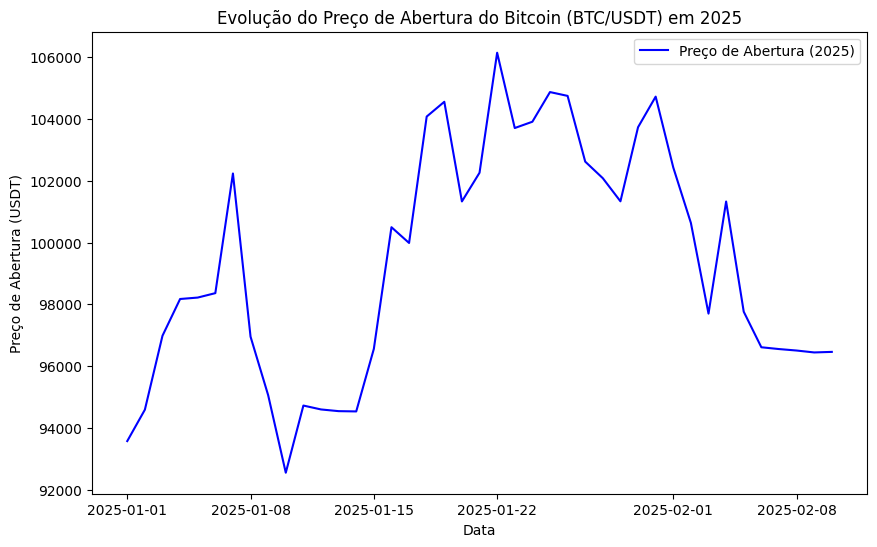

In [127]:
# Filtrando apenas os dados de 2025
btc_data_2025 = btc_data[btc_data["timestamp"].dt.year == 2025]

# Visualização do Preço de Abertura ao longo do tempo em 2025
plt.figure(figsize=(10, 6))
plt.plot(
    btc_data_2025["timestamp"],
    btc_data_2025["open"],
    label="Preço de Abertura (2025)",
    color="blue",
)
plt.xlabel("Data")
plt.ylabel("Preço de Abertura (USDT)")
plt.title("Evolução do Preço de Abertura do Bitcoin (BTC/USDT) em 2025")
plt.legend()
plt.show()

In [129]:
# Incluindo colunas de média móvel (moving average) de 3 dias
btc_data["open_ma3"] = btc_data["open"].rolling(window=3).mean()
btc_data["close_ma3"] = btc_data["close"].rolling(window=3).mean()
btc_data["volume_ma3"] = btc_data["volume"].rolling(window=3).mean()
btc_data["high_ma3"] = btc_data["high"].rolling(window=3).mean()
btc_data["low_ma3"] = btc_data["low"].rolling(window=3).mean()

In [130]:
# Criando colunas de shift para o preço de abertura e fechamento do dia anterior
btc_data["open_shift"] = btc_data["open"].shift(1)
btc_data["close_shift"] = btc_data["close"].shift(1)

In [132]:
# Criando uma feature de indicacao (target) onde:
# se a variacao percentual entre a aberura e o fechamento for positiva (> 0.5%), a variavel indicacao recebe 1
# se a variacao percentual entre a aberura e o fechamento for menor que 0.5%, a variavel indicacao recebe 0
btc_data["variation"] = (btc_data["close"] - btc_data["open"]) / btc_data["open"]
btc_data["indication"] = (btc_data["variation"] > 0.005).astype(int)

In [133]:
btc_data.tail()

,timestamp,open,high,low,close,volume,open_ma3,close_ma3,volume_ma3,high_ma3,low_ma3,open_shift,close_shift,variation,indication
2730,2025-02-06,96612.44,99120.00,95676.64,96554.35,23515.20405,98568.030000,96976.636667,30005.498487,100000.436667,95993.880000,97763.14,96612.43,-0.000601,0
2731,2025-02-07,96554.35,100137.99,95620.34,96506.80,31794.22065,96976.643333,96557.860000,27180.909713,99468.996667,95817.326667,96612.44,96554.35,-0.000492,0
2732,2025-02-08,96506.80,96880.00,95688.00,96444.74,10147.24294,96557.863333,96501.963333,21818.889213,98712.663333,95661.660000,96554.35,96506.80,-0.000643,0
2733,2025-02-09,96444.75,97323.09,94713.00,96462.75,14120.91613,96501.966667,96471.430000,18687.459907,98113.693333,95340.446667,96506.80,96444.74,0.000187,0
2734,2025-02-10,96462.75,98345.00,95256.00,97291.85,17862.49854,96471.433333,96733.113333,14043.552537,97516.030000,95219.000000,96444.75,96462.75,0.008595,1


In [134]:
# Correlação entre as variáveis
correlation_matrix = btc_data.corr()
display(correlation_matrix)

,timestamp,open,high,low,close,volume,open_ma3,close_ma3,volume_ma3,high_ma3,low_ma3,open_shift,close_shift,variation,indication
timestamp,1.000000,0.775134,0.772410,0.779502,0.775275,0.198580,0.775238,0.775381,0.208377,0.772422,0.779678,0.774915,0.775062,-0.005875,-0.051358
open,0.775134,1.000000,0.999426,0.999116,0.998841,-0.083915,0.999375,0.999731,-0.088081,0.999516,0.999459,0.998837,1.000000,-0.020423,-0.031956
high,0.772410,0.999426,1.000000,0.998900,0.999497,-0.079586,0.998904,0.999619,-0.085218,0.999477,0.998957,0.998417,0.999426,-0.001090,-0.015009
low,0.779502,0.999116,0.998900,1.000000,0.999338,-0.090194,0.998378,0.999272,-0.091318,0.998572,0.999285,0.997845,0.999116,0.001082,-0.018635
close,0.775275,0.998841,0.999497,0.999338,1.000000,-0.084662,0.998269,0.999377,-0.088052,0.998821,0.998810,0.997772,0.998841,0.015664,-0.004286
volume,0.198580,-0.083915,-0.079586,-0.090194,-0.084662,1.000000,-0.084235,-0.084713,0.944845,-0.081557,-0.087893,-0.083755,-0.084250,-0.007410,0.024468
open_ma3,0.775238,0.999375,0.998904,0.998378,0.998269,-0.084235,1.000000,0.999630,-0.087815,0.999785,0.999584,0.999731,0.999375,-0.020181,-0.029987
close_ma3,0.775381,0.999731,0.999619,0.999272,0.999377,-0.084713,0.999630,1.000000,-0.088044,0.999790,0.999707,0.999374,0.999732,-0.008310,-0.021632
volume_ma3,0.208377,-0.088081,-0.085218,-0.091318,-0.088052,0.944845,-0.087815,-0.088044,1.000000,-0.084834,-0.091495,-0.087865,-0.088081,0.003424,0.011047
high_ma3,0.772422,0.999516,0.999477,0.998572,0.998821,-0.081557,0.999785,0.999790,-0.084834,1.000000,0.999367,0.999517,0.999516,-0.013623,-0.024269


O meu target será a feature de indication. Por enquanto ainda não encontramos nenhuma correlação relevante entre as features que seja promissora para o nosso modelo de machine learning. Ainda temos muita redundância que depois iremos tratar.

## Índice VIX

O índice VIX, conhecido como Índice de Volatilidade ou “Índice do Medo”, mede a expectativa de volatilidade do mercado de ações dos Estados Unidos para os próximos 30 dias, com base nas opções do S&P 500. Calculado pela Chicago Board Options Exchange (CBOE), o VIX reflete o nível de incerteza e risco percebido pelos investidores, sendo frequentemente utilizado como um indicador de aversão ao risco. Quando o VIX está alto, geralmente indica maior ansiedade no mercado, sugerindo volatilidade futura elevada. Por outro lado, valores baixos indicam períodos de estabilidade. Ele é amplamente usado por traders e analistas para antecipar movimentos de mercado e ajustar estratégias de hedge ou investimento.

A economia americana é uma grande influenciadora do mercado financeiro mundial, e a maior influenciadora do mercado de criptomoedas. Utilizar o VIX como uma ferramenta para indicar a tendência de mercado parece uma ótima ideia.

Para coletar os dados do VIX vamos utilizar a biblioteca yfinance. A biblioteca yfinance é uma ferramenta do Python que permite acessar e baixar dados financeiros históricos e em tempo real de ações, índices, moedas e outros ativos diretamente do Yahoo Finance para análise e modelagem financeira.

In [135]:
# Instalar a biblioteca yfinance
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importar a biblioteca yfinance
import yfinance as yf

In [137]:
# Baixar dados do VIX usando yfinance
def fetch_vix_data():
    start_date = btc_data["timestamp"].min().strftime("%Y-%m-%d")
    end_date = btc_data["timestamp"].max().strftime("%Y-%m-%d")
    vix = yf.download("^VIX", start=start_date, end=end_date, interval="1d")
    vix = vix[["Open", "High", "Low", "Close"]].reset_index()
    vix.columns = ["timestamp", "vix_open", "vix_high", "vix_low", "vix_close"]

    # Inserir uma coluna da variação diária e a média diária do VIX
    vix["vix_variation"] = vix["vix_high"] - vix["vix_low"]
    vix["vix_mean"] = (vix["vix_high"] + vix["vix_low"]) / 2

    return vix

In [138]:
vix_data = fetch_vix_data()

[*********************100%***********************]  1 of 1 completed


In [139]:
vix_data.head()

,timestamp,vix_open,vix_high,vix_low,vix_close,vix_variation,vix_mean
0,2017-08-17,11.81,15.770000,11.54,15.55,4.230000,13.655
1,2017-08-18,15.38,16.040001,13.32,14.26,2.720001,14.680
2,2017-08-21,14.59,14.740000,13.07,13.19,1.670000,13.905
3,2017-08-22,12.60,12.940000,11.35,11.35,1.589999,12.145
4,2017-08-23,11.51,12.590000,11.39,12.25,1.200000,11.990


In [140]:
# Média móvel (moving average) de 3 dias
vix_data["vix_open_ma3"] = vix_data["vix_open"].rolling(window=3).mean()
vix_data["vix_close_ma3"] = vix_data["vix_close"].rolling(window=3).mean()
vix_data["vix_variation_ma3"] = vix_data["vix_variation"].rolling(window=3).mean()
vix_data["vix_mean_ma3"] = vix_data["vix_mean"].rolling(window=3).mean()

In [141]:
vix_data.head()

,timestamp,vix_open,vix_high,vix_low,vix_close,vix_variation,vix_mean,vix_open_ma3,vix_close_ma3,vix_variation_ma3,vix_mean_ma3
0,2017-08-17,11.81,15.770000,11.54,15.55,4.230000,13.655,NaN,NaN,NaN,NaN
1,2017-08-18,15.38,16.040001,13.32,14.26,2.720001,14.680,NaN,NaN,NaN,NaN
2,2017-08-21,14.59,14.740000,13.07,13.19,1.670000,13.905,13.926667,14.333333,2.873334,14.080000
3,2017-08-22,12.60,12.940000,11.35,11.35,1.589999,12.145,14.190000,12.933333,1.993333,13.576667
4,2017-08-23,11.51,12.590000,11.39,12.25,1.200000,11.990,12.900000,12.263333,1.486666,12.680000


In [144]:
# Unir os dados de BTC e VIX pelo timestamp
btc_data["date"] = btc_data["timestamp"].dt.date
vix_data["date"] = vix_data["timestamp"].dt.date
merged_data = pd.merge(btc_data, vix_data, on="date", how="inner")

In [145]:
# Remover a coluna duplicada de date
merged_data.drop(["date"], axis=1, inplace=True)

In [146]:
# Os finais de semana foram removidos
merged_data.head(14)

,timestamp_x,open,high,low,close,volume,open_ma3,close_ma3,volume_ma3,high_ma3,...,vix_open,vix_high,vix_low,vix_close,vix_variation,vix_mean,vix_open_ma3,vix_close_ma3,vix_variation_ma3,vix_mean_ma3
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,NaN,NaN,NaN,...,11.81,15.770000,11.54,15.55,4.230000,13.655,NaN,NaN,NaN,NaN
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,NaN,NaN,NaN,NaN,...,15.38,16.040001,13.32,14.26,2.720001,14.680,NaN,NaN,NaN,NaN
2,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,4099.493333,4080.756667,513.378615,4171.796667,...,14.59,14.740000,13.07,13.19,1.670000,13.905,13.926667,14.333333,2.873334,14.080000
3,2017-08-22,4016.00,4104.82,3400.00,4040.00,966.684858,4068.703333,4047.430000,708.503647,4145.173333,...,12.60,12.940000,11.35,11.35,1.589999,12.145,14.190000,12.933333,1.993333,13.576667
4,2017-08-23,4040.00,4265.80,4013.89,4114.01,1001.136565,4041.710000,4056.670000,886.521494,4163.413333,...,11.51,12.590000,11.39,12.25,1.200000,11.990,12.900000,12.263333,1.486666,12.680000
5,2017-08-24,4147.00,4371.68,4085.01,4316.01,787.418753,4067.666667,4156.673333,918.413392,4247.433333,...,12.06,12.830000,11.55,12.23,1.280000,12.190,12.056667,11.943333,1.356666,12.108333
6,2017-08-25,4316.01,4453.91,4247.48,4280.68,573.612740,4167.670000,4236.900000,787.389353,4363.796667,...,12.20,12.450000,11.10,11.28,1.349999,11.775,11.923333,11.920000,1.276666,11.985000
7,2017-08-28,4310.01,4399.82,4124.54,4386.69,603.841616,4307.743333,4344.713333,394.214090,4388.940000,...,12.09,12.110000,11.23,11.32,0.880000,11.670,12.116667,11.610000,1.170000,11.878333
8,2017-08-29,4353.65,4625.85,4313.55,4587.48,603.545028,4332.056667,4428.060000,519.359743,4475.223333,...,13.33,14.340000,11.48,11.70,2.860001,12.910,12.540000,11.433333,1.696667,12.118333
9,2017-08-30,4564.52,4647.51,4416.01,4555.14,808.468771,4409.393333,4509.770000,671.951805,4557.726667,...,11.40,11.980000,10.96,11.22,1.020000,11.470,12.273333,11.413333,1.586667,12.016666


In [147]:
# Excluindo as linhas com valores nulos
merged_data.dropna(inplace=True)

In [148]:
merged_data.shape

(1878, 26)

In [149]:
# Correlação entre as variáveis
correlation_matrix = merged_data.corr()
display(correlation_matrix)

,timestamp_x,open,high,low,close,volume,open_ma3,close_ma3,volume_ma3,high_ma3,...,vix_open,vix_high,vix_low,vix_close,vix_variation,vix_mean,vix_open_ma3,vix_close_ma3,vix_variation_ma3,vix_mean_ma3
timestamp_x,1.000000,0.774420,0.771740,0.778773,0.774476,0.224383,0.774320,0.774679,0.220226,0.771715,...,0.054863,0.036174,0.071847,0.049600,-0.077551,0.052511,0.056704,0.051229,-0.089292,0.054213
open,0.774420,1.000000,0.999339,0.999002,0.998537,-0.074741,0.999311,0.999673,-0.079536,0.999473,...,-0.119772,-0.116739,-0.117551,-0.118518,-0.075259,-0.117920,-0.120364,-0.121318,-0.090723,-0.119620
high,0.771740,0.999339,1.000000,0.998900,0.999439,-0.071112,0.998757,0.999586,-0.076660,0.999414,...,-0.117633,-0.115332,-0.116164,-0.117432,-0.074264,-0.116512,-0.118222,-0.119419,-0.087888,-0.117629
low,0.778773,0.999002,0.998900,1.000000,0.999241,-0.080522,0.998238,0.999229,-0.082686,0.998519,...,-0.121706,-0.121085,-0.119839,-0.122300,-0.084005,-0.121368,-0.121539,-0.123414,-0.095041,-0.121446
close,0.774476,0.998537,0.999439,0.999241,1.000000,-0.075612,0.997944,0.999239,-0.079395,0.998629,...,-0.119058,-0.118445,-0.118021,-0.120731,-0.079913,-0.119080,-0.119370,-0.121312,-0.091258,-0.119260
volume,0.224383,-0.074741,-0.071112,-0.080522,-0.075612,1.000000,-0.074140,-0.074887,0.958246,-0.071907,...,0.346448,0.331594,0.362463,0.344519,0.132429,0.347826,0.343776,0.345372,0.121313,0.345728
open_ma3,0.774320,0.999311,0.998757,0.998238,0.997944,-0.074140,1.000000,0.999588,-0.079013,0.999762,...,-0.118309,-0.114754,-0.116343,-0.117088,-0.071727,-0.116271,-0.120018,-0.120340,-0.087550,-0.118744
close_ma3,0.774679,0.999673,0.999586,0.999229,0.999239,-0.074887,0.999588,1.000000,-0.079433,0.999785,...,-0.119104,-0.116689,-0.117356,-0.118849,-0.075638,-0.117804,-0.120093,-0.121155,-0.090110,-0.119382
volume_ma3,0.220226,-0.079536,-0.076660,-0.082686,-0.079395,0.958246,-0.079013,-0.079433,1.000000,-0.076096,...,0.344805,0.323966,0.360873,0.339039,0.110165,0.342866,0.348143,0.346875,0.122533,0.348212
high_ma3,0.771715,0.999473,0.999414,0.998519,0.998629,-0.071907,0.999762,0.999785,-0.076096,1.000000,...,-0.117055,-0.113812,-0.115423,-0.116233,-0.071037,-0.115332,-0.118462,-0.118986,-0.085945,-0.117354


## Insights

### 1. Correlação entre o volume e o índice de volatilidade (VIX):

- **Volume de negociação:** O volume apresenta correlações moderadas com o índice de volatilidade (e suas variações), como observado com `vix_open` (0,34) e `vix_mean` (0,35). Isso sugere que o volume pode funcionar como um preditor indireto para movimentos no preço do Bitcoin, especialmente durante períodos de alta volatilidade.
- **Média móvel do volume:** A variável `volume_ma3` (média móvel de 3 períodos do volume) é capaz de captar picos de negociação que indicam aumentos na atividade de mercado, podendo sinalizar mudanças futuras no preço.
- **Interpretação adicional:** Em momentos de incerteza, um aumento no volume pode refletir uma intensificação das operações dos traders, o que pode antecipar reversões ou consolidar tendências de preços.

### 2. Importância do VIX e suas estatísticas para previsão de volatilidade:

- **Indicadores do VIX:** Variáveis como `vix_mean`, `vix_variation` e suas médias móveis (`vix_mean_ma3`) demonstram correlações moderadas com o preço do Bitcoin (entre -0,11 e -0,12). Apesar de não serem relações extremamente fortes, elas capturam nuances na volatilidade que podem afetar movimentos bruscos de preço.
- **Sentimento e risco de mercado:** O VIX é amplamente reconhecido como um termômetro do medo e da incerteza no mercado. Mesmo correlações moderadas são relevantes, pois aumentos no VIX podem antecipar períodos de maior risco e volatilidade.
- **Aplicação prática:** Incorporar esses indicadores em modelos preditivos pode ajudar na identificação de períodos de instabilidade, auxiliando na gestão de riscos e na definição de estratégias de hedge.

Durante períodos de alta volatilidade, o **aumento no índice VIX é frequentemente associado a uma maior aversão ao risco, levando investidores a vender ativos de risco, como o Bitcoin**, e buscar refúgio em ativos mais estáveis, como ouro ou títulos do governo. A correlação moderada entre o volume de negociação e o VIX indica que o interesse no mercado de Bitcoin aumenta durante esses períodos, possivelmente devido à especulação ou ajustes em portfólios. A média móvel de 3 períodos do volume (volume_ma3) pode identificar picos de interesse que precedem movimentos significativos no preço, sugerindo oportunidades de antecipação.

In [150]:
# salvando o dataframe em um arquivo CSV
merged_data.to_csv("merged_data.csv", index=False)